# <a id='top'></a> Task 2.2 - Data Insights

After data cleaning, it's time for some funny explorations. The goal is to find meaningful insights for customers and their purchasing behavior.  
You will see univariate, bivariate, and multivariate analysis; some clustering attempts. This work's outcome is the input for the marketing team, so the job done must be more accurate possible.  
Beyond the simple analysis, let's try to answer some questions about data. These questions aren't part of the virtual internship.  
1. [What is the product most sold and the one that makes more profit?](#Question1)
2. [Are there insightful patterns of sales in time?](#Question2)
3. [What are the features that characterize the most spending customers?](#Question3)
4. [Are there any differences for customers based on states or postcodes?](#Question4)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
transactions = pd.read_csv("../Data/transactions.csv")
customer_address = pd.read_csv("../Data/customer_address.csv")
customer_demographic = pd.read_csv("../Data/customer_demographic.csv")

In [3]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20


In [4]:
customer_address.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [5]:
customer_demographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age,age_bins
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66,60-69
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39,30-39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66,60-69


## Exploratory Data Analysis

### <a id='Question1'></a> 1. What is the product most sold and the one that makes more profit?
##### [Top](#top)

In my opinion, this first question can be clarifying what are the products most sold and what are the most profitable.  
Try to discover if the Pareto principle is applicable in this particular case (20% of the products generate 80% of revenue).

In [6]:
# Check what product_id most sold
transactions['product_id'].value_counts()

0      1154
3       349
1       305
38      267
35      261
       ... 
71      134
16      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64

In [7]:
transactions[transactions['product_id']==0].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1993-10-02
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,2006-11-10


The product_id most sold is the product 0. We suppose that this product_id represents different types of products because of the different list_prices and features. Maybe the product_id equal to 0 can be an id used to identify other products.  
It's worth to inspect this and find how much is the impact of this product_id on the total profit.

In [8]:
# Inspect if product_id 0 can be different products
transactions[transactions['product_id']==0]['list_price'].value_counts()

71.49     78
360.40    65
60.34     62
363.01    61
543.39    56
230.91    56
544.05    55
533.51    55
227.88    54
12.01     50
183.86    50
290.62    49
100.35    47
235.63    47
478.16    46
569.56    45
416.98    41
495.72    40
71.16     38
499.53    37
441.49    33
358.39    31
175.89    31
202.62    27
Name: list_price, dtype: int64

In [9]:
# Inspect if the others product_id have a single list price

# Create a list of product_id different from 0
product_list = transactions[transactions['product_id']!=0]['product_id'].unique().tolist()

# Select 10 products random and check if they has only one list_price value
for _ in range(10):
    index = np.random.randint(0,len(product_list))
    value_counts = transactions[transactions['product_id']==product_list[index]]['list_price'].value_counts()
    print(f'Product_id: {product_list[index]}')
    print(value_counts, '\n')

Product_id: 55
1894.19    166
Name: list_price, dtype: int64 

Product_id: 63
1483.20    131
1992.93     39
Name: list_price, dtype: int64 

Product_id: 71
1842.92    134
Name: list_price, dtype: int64 

Product_id: 82
1148.64    142
1538.99     53
Name: list_price, dtype: int64 

Product_id: 62
478.16     146
1024.66     36
Name: list_price, dtype: int64 

Product_id: 71
1842.92    134
Name: list_price, dtype: int64 

Product_id: 98
358.39    107
795.34     46
Name: list_price, dtype: int64 

Product_id: 78
1765.3    145
Name: list_price, dtype: int64 

Product_id: 11
1274.93    123
1775.81     44
Name: list_price, dtype: int64 

Product_id: 21
1071.23    147
1466.68     50
Name: list_price, dtype: int64 



In [10]:
transactions[transactions['product_id']==19].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
27,28,19,76,2017-12-23,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,2016-07-09
190,196,19,1315,2017-12-21,1.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1999-06-23
223,229,19,2687,2017-03-13,1.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,2011-08-29
705,723,19,1284,2017-07-28,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,2009-03-08
790,811,19,700,2017-07-10,1.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,2009-03-08


So my hypotesis that product_id equal to 0 can be the aggregation of different products is correct, but other products too have different list_prices and features.  
The next step is to understand if the combination of product_id, brand, product_line, product_class and product_size can be a better identifier for single products.

In [11]:
product_list = list(zip(transactions['product_id'].map(str),transactions['brand'],transactions['product_line'],transactions['product_class'],transactions['product_size']))
transactions['product_category'] = ['-'.join(tups) for tups in product_list] 
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large


In [12]:
grouped_product = transactions.groupby(['product_category'])['list_price'].nunique().reset_index()
print(f'Unique combination of product_id and product features are: {grouped_product.shape[0]}')

Unique combination of product_id and product features are: 188


In [13]:
grouped_product[grouped_product['list_price']!=1]

,product_category,list_price
2,0-Norco Bicycles-Road-medium-medium,2
8,0-OHM Cycles-Standard-medium-medium,2
11,0-Solex-Standard-medium-medium,4
12,0-Trek Bicycles-Road-medium-medium,2
13,0-Trek Bicycles-Standard-high-medium,2
27,13-Solex-Standard-medium-medium,2
71,36-Solex-Standard-low-medium,2
103,54-WeareA2B-Standard-medium-medium,2
139,74-WeareA2B-Standard-medium-medium,2
158,85-WeareA2B-Standard-medium-medium,2


Ok, the results are better than the previous analysis. Almost every combination of product_id and product features have only one list_price. Only eight product combinations (4.3%) have two or more list_prices; this is an aspect not covered in this virtual internship. In a real project, this needs some inspections (sales on sale, promotion for a customer, etc.) to understand our dataset better.

In [14]:
# Add column profit for every transaction
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

# Create a groupby with count and profit for each product
impact_product = transactions.groupby(['product_category'])['profit'].agg(['count','sum']).reset_index()
impact_product.sort_values('count', inplace=True, ascending=False)

In [15]:
impact_product.head(10)

,product_category,count,sum
58,3-Trek Bicycles-Standard-medium-large,349,594189.95
17,1-Giant Bicycles-Standard-medium-medium,266,119348.88
71,36-Solex-Standard-low-medium,204,127357.96
11,0-Solex-Standard-medium-medium,204,22591.83
103,54-WeareA2B-Standard-medium-medium,193,233890.92
139,74-WeareA2B-Standard-medium-medium,192,158108.16
40,2-Solex-Standard-medium-medium,191,3413.17
27,13-Solex-Standard-medium-medium,188,118259.76
158,85-WeareA2B-Standard-medium-medium,186,114948.44
76,4-Giant Bicycles-Standard-high-medium,176,79490.40


In [16]:
# Explore the impact of every product in percentage (count and profit)
impact_product['% total_count'] = round(impact_product['count']/impact_product['count'].sum()*100,2)
impact_product['% total_profit'] = round(impact_product['sum']/impact_product['sum'].sum()*100,2)

# Sort values for % of total profit
impact_product.sort_values('% total_profit', inplace=True, ascending=False)
impact_product.head(10)

,product_category,count,sum,% total_count,% total_profit
58,3-Trek Bicycles-Standard-medium-large,349,594189.95,1.80,5.54
107,57-WeareA2B-Touring-medium-large,170,277142.50,0.87,2.58
103,54-WeareA2B-Standard-medium-medium,193,233890.92,0.99,2.18
72,37-OHM Cycles-Standard-low-medium,151,233236.11,0.78,2.17
85,44-WeareA2B-Standard-medium-medium,136,225879.68,0.70,2.11
128,68-OHM Cycles-Standard-medium-medium,141,224498.79,0.73,2.09
138,73-Solex-Standard-medium-medium,134,216041.50,0.69,2.01
104,55-Trek Bicycles-Road-medium-large,166,215041.38,0.85,2.00
155,83-Solex-Touring-medium-large,151,212745.41,0.78,1.98
74,38-Trek Bicycles-Standard-medium-large,111,188983.05,0.57,1.76


In [17]:
impact_product['cum_sum_perc_total_count'] = impact_product['% total_count'].cumsum()
impact_product['cum_sum_perc_total_profit'] = impact_product['% total_profit'].cumsum()
impact_product.head(25)

,product_category,count,sum,% total_count,% total_profit,cum_sum_perc_total_count,cum_sum_perc_total_profit
58,3-Trek Bicycles-Standard-medium-large,349,594189.95,1.80,5.54,1.80,5.54
107,57-WeareA2B-Touring-medium-large,170,277142.50,0.87,2.58,2.67,8.12
103,54-WeareA2B-Standard-medium-medium,193,233890.92,0.99,2.18,3.66,10.30
72,37-OHM Cycles-Standard-low-medium,151,233236.11,0.78,2.17,4.44,12.47
85,44-WeareA2B-Standard-medium-medium,136,225879.68,0.70,2.11,5.14,14.58
128,68-OHM Cycles-Standard-medium-medium,141,224498.79,0.73,2.09,5.87,16.67
138,73-Solex-Standard-medium-medium,134,216041.50,0.69,2.01,6.56,18.68
104,55-Trek Bicycles-Road-medium-large,166,215041.38,0.85,2.00,7.41,20.68
155,83-Solex-Touring-medium-large,151,212745.41,0.78,1.98,8.19,22.66
74,38-Trek Bicycles-Standard-medium-large,111,188983.05,0.57,1.76,8.76,24.42


Wow. This analysis can be an important discovery: from the top 10 most sold products, only two of them are in the top 10 of the most profitable products (the third is in the 25th position).  
Moreover, the top 25 products combined represent 20% of the products sold and  47% of the total profit.

### <a id='Question2'></a> 2. Are there insightful patterns of sales in time?
##### [Top](#top)

## <span style="color:red">Write introduction of the question</span>

In [18]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82


#### Daily Sales

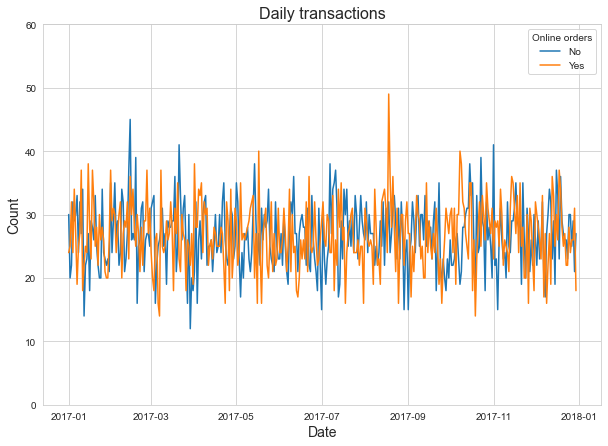

In [19]:
# Count the sales for every day
grouped_date = transactions.groupby(['transaction_date','online_order'])['transaction_id'].agg(['count']).reset_index()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.lineplot(data=grouped_date, x="transaction_date", y="count", hue='online_order')
plt.legend(labels=['No','Yes'], title='Online orders')
plt.title('Daily transactions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0,60)
plt.show()

#### Weekly sales

In [20]:
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39


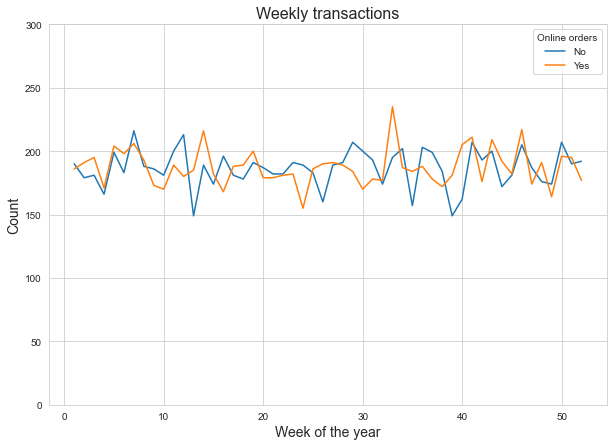

In [21]:
# Count the sales for every week
grouped_week = transactions.groupby(['week','online_order'])['transaction_id'].agg(['count']).reset_index()
grouped_week.head()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.lineplot(data=grouped_week, x="week", y="count", hue="online_order")
plt.title('Weekly transactions', fontsize=16)
plt.legend(labels=['No','Yes'], title='Online orders')
plt.xlabel('Week of the year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0,300)
plt.show()

#### Monthly sales

In [22]:
# Let's check the month
transactions['month'] = transactions['transaction_date'].dt.month
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week,month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39,10


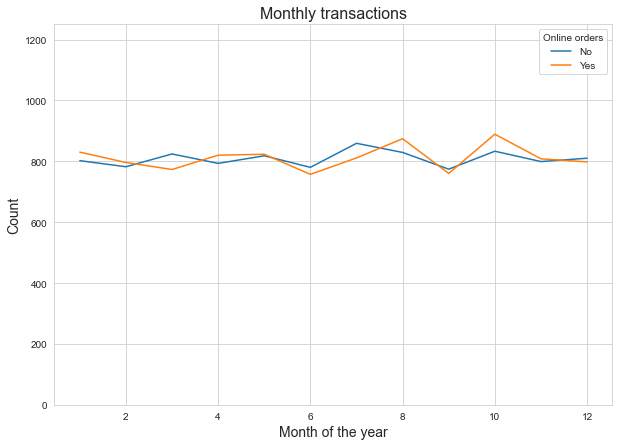

In [23]:
# Count the sales for every month
grouped_month = transactions.groupby(['month','online_order'])['transaction_id'].agg(['count']).reset_index()
grouped_month.head()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.lineplot(data=grouped_month, x="month", y="count", hue='online_order')
plt.legend(labels=['No','Yes'], title='Online orders')
plt.title('Monthly transactions', fontsize=16)
plt.xlabel('Month of the year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, 1250)
plt.show()

#### Daily sales divided per months

In [24]:
# Let's check the month
transactions['day'] = transactions['transaction_date'].dt.day
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week,month,day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5,21
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42,10,16
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35,8,31
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39,10,1


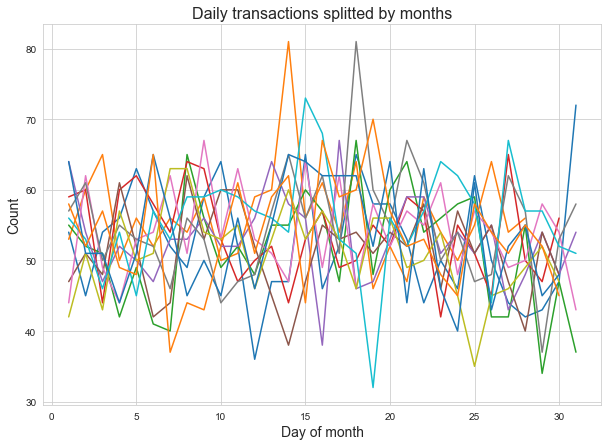

In [25]:
# Count the sales for every month
grouped_month_day = transactions.groupby(['month','day'])['transaction_id'].agg(['count']).reset_index()
grouped_month_day.head()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
for month in grouped_month_day['month'].unique():
    month = grouped_month_day[grouped_month_day['month']==month][['day','count']]
    sns.lineplot(data=month, x="day", y="count")
    
plt.title('Daily transactions splitted by months', fontsize=16)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#### Day of the week sales

In [26]:
transactions['day_of_week'] = transactions['transaction_date'].dt.dayofweek
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week,month,day,day_of_week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2,25,5
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5,21,6
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42,10,16,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35,8,31,3
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39,10,1,6


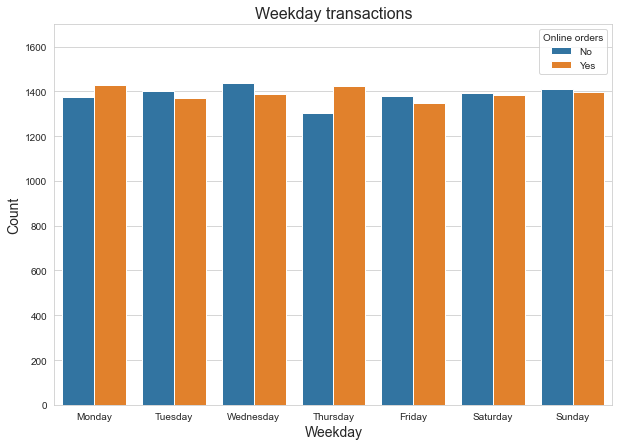

In [27]:
# Count the sales for every month
grouped_dow = transactions.groupby(['day_of_week','online_order'])['transaction_id'].agg(['count']).reset_index()
grouped_dow.head()

name_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
number_days = np.arange(0,7)

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
ax = sns.barplot(data=grouped_dow, x="day_of_week", y="count", hue="online_order")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'], title="Online orders", loc='upper right')

plt.title('Weekday transactions', fontsize=16)
plt.xticks(number_days, name_days)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, 1700)
plt.show()

We've searched trends and patterns in sales data to understand if there was any relation. In monthly sales, some variations can be noticed, but this is probably a hypothesis to test (if these variations are guided by randomness).

#### Monthly active customers vs Monthly sales

In [28]:
monthly_active = transactions.groupby('month')['customer_id'].nunique().reset_index()
monthly_active['perc_previous_month'] = round(monthly_active['customer_id'].pct_change() * 100, 2)
monthly_active

,month,customer_id,perc_previous_month
0,1,1320,NaN
1,2,1258,-4.70
2,3,1277,1.51
3,4,1284,0.55
4,5,1281,-0.23
5,6,1238,-3.36
6,7,1327,7.19
7,8,1346,1.43
8,9,1240,-7.88
9,10,1377,11.05


In [29]:
monthly_sales = transactions.groupby('month')['transaction_date'].count().reset_index()
monthly_sales['perc_previous_month'] = round(monthly_sales['transaction_date'].pct_change() * 100, 2)
monthly_sales

,month,transaction_date,perc_previous_month
0,1,1632,NaN
1,2,1578,-3.31
2,3,1597,1.20
3,4,1613,1.00
4,5,1641,1.74
5,6,1537,-6.34
6,7,1670,8.65
7,8,1703,1.98
8,9,1534,-9.92
9,10,1722,12.26


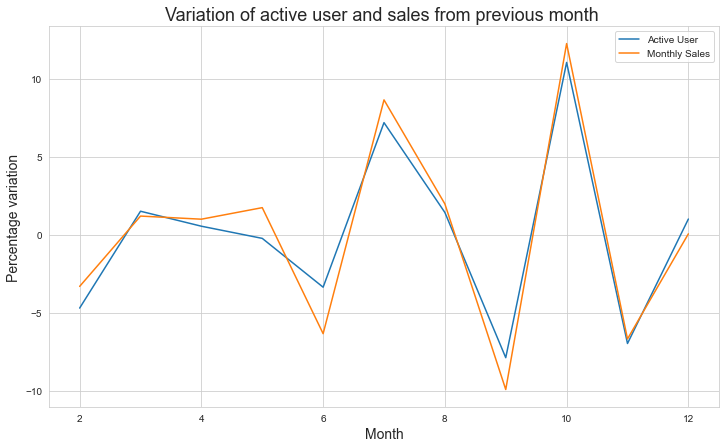

In [30]:
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_active, x='month', y='perc_previous_month', label='Active User')
sns.lineplot(data=monthly_sales, x='month', y='perc_previous_month', label='Monthly Sales')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage variation', fontsize=14)
plt.title('Variation of active user and sales from previous month ', fontsize=18)
plt.show()

## <span style="color:red">Write insights about variation of active user and sales</span>

#### New customers for every month

In [33]:
# Create the first purchase month
first_purchase = transactions.groupby('customer_id')['month'].min().reset_index()
first_purchase.columns = ['customer_id','month_first_purchase']

# Merge the first purchase column with transactions dataset
transactions = pd.merge(transactions, first_purchase, on='customer_id')

In [37]:
# Create column if new or existing customer
transactions['new_customer'] = transactions['month'] <= transactions['month_first_purchase']
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,standard_cost,product_first_sold_date,product_category,profit,week,month,day,day_of_week,month_first_purchase,new_customer
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2,25,5,2,True
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,954.82,2003-02-07,1-Giant Bicycles-Standard-medium-medium,448.68,42,10,16,0,2,False
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,298.72,2010-11-05,62-Solex-Standard-medium-medium,179.44,17,4,26,2,2,False
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5,21,6,1,False
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,677.48,2011-04-16,4-Giant Bicycles-Standard-high-medium,451.65,40,10,5,3,1,False


In [84]:
# Count the number of new customers and existing customer per months
customers = transactions.groupby(['month','new_customer'])['customer_id'].nunique().reset_index()
ratio_newold_customers = customers.pivot(index='month', columns='new_customer', values='customer_id').reset_index()
ratio_newold_customers.columns = ['month','existing_customers','new_customers']

# Create ratio of new_customers over old customers
ratio_newold_customers['ratio_new_customers'] = ratio_newold_customers['new_customers']/ratio_newold_customers['existing_customers']
ratio_newold_customers

,month,existing_customers,new_customers,ratio_new_customers
0,1,NaN,1320.0,NaN
1,2,464.0,794.0,1.711207
2,3,787.0,490.0,0.622618
3,4,943.0,341.0,0.361612
4,5,1067.0,214.0,0.200562
5,6,1110.0,128.0,0.115315
6,7,1244.0,83.0,0.066720
7,8,1292.0,54.0,0.041796
8,9,1215.0,25.0,0.020576
9,10,1354.0,23.0,0.016987


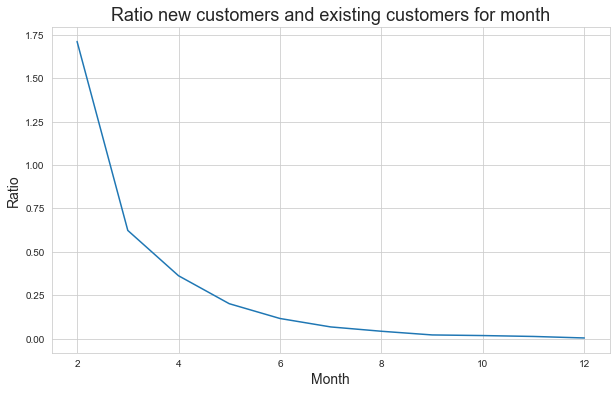

In [95]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ratio_newold_customers,x='month',y='ratio_new_customers')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.title('Ratio new customers and existing customers for month', fontsize=18)
plt.show()

## <span style="color:red">Write insights about ratio of new and existing users</span>

## <span style="color:red">Write conclusions about the questions</span>

### <a id='Question3'></a> 3. What are the features that characterize the most spending customers?
##### [Top](#top)

## <span style="color:red">Write introduction of the question</span>

In [96]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,standard_cost,product_first_sold_date,product_category,profit,week,month,day,day_of_week,month_first_purchase,new_customer
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2,25,5,2,True
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,954.82,2003-02-07,1-Giant Bicycles-Standard-medium-medium,448.68,42,10,16,0,2,False
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,298.72,2010-11-05,62-Solex-Standard-medium-medium,179.44,17,4,26,2,2,False
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5,21,6,1,False
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,677.48,2011-04-16,4-Giant Bicycles-Standard-high-medium,451.65,40,10,5,3,1,False


#### Create RFM values for customer_id

In [97]:
# Create dataset with unique customers
customers = pd.DataFrame(transactions['customer_id'].unique(), columns=['customer_id'])
print(f'The unique customers are {customers.shape[0]}.')

The unique customers are 3491.


In [98]:
# Create recency values
transactions['recency'] = (transactions['transaction_date'].max() - transactions['transaction_date']).dt.days
recency = transactions.groupby('customer_id')['recency'].min().reset_index()

# Join customer recency to customer dataset
customers = pd.merge(customers, recency, on='customer_id')
customers.head()

,customer_id,recency
0,2950,75
1,3120,20
2,402,56
3,3135,121
4,787,75


In [99]:
# Create frequency values
frequency = transactions.groupby('customer_id')['transaction_date'].count().reset_index()

# Join customer recency to customer dataset
customers = pd.merge(customers, frequency, on='customer_id')
customers.rename(columns={'transaction_date':'frequency'}, inplace=True)
customers.head()

,customer_id,recency,frequency
0,2950,75,3
1,3120,20,7
2,402,56,6
3,3135,121,7
4,787,75,10


In [100]:
# Create monetary values
monetary = transactions.groupby('customer_id')['list_price'].sum().reset_index()

# Join customer recency to customer dataset
customers = pd.merge(customers, monetary, on='customer_id')
customers.rename(columns={'list_price':'monetary'}, inplace=True)
customers.head()

,customer_id,recency,frequency,monetary
0,2950,75,3,1953.15
1,3120,20,7,7351.70
2,402,56,6,8148.22
3,3135,121,7,7539.81
4,787,75,10,11292.54


#### Visualize RFM values

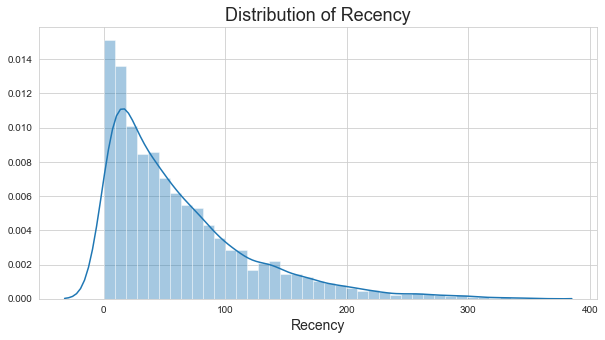

In [101]:
# Plot Distribution of Recency
plt.figure(figsize=(10,5))
sns.distplot(customers['recency'])
plt.xlabel('Recency', fontsize=14)
plt.title('Distribution of Recency', fontsize=18)
plt.show()

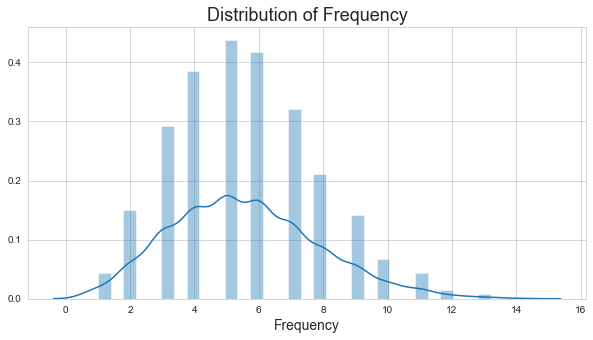

In [102]:
# Plot Distribution of Frequency
plt.figure(figsize=(10,5))
sns.distplot(customers['frequency'])
plt.xlabel('Frequency', fontsize=14)
plt.title('Distribution of Frequency', fontsize=18)
plt.show()

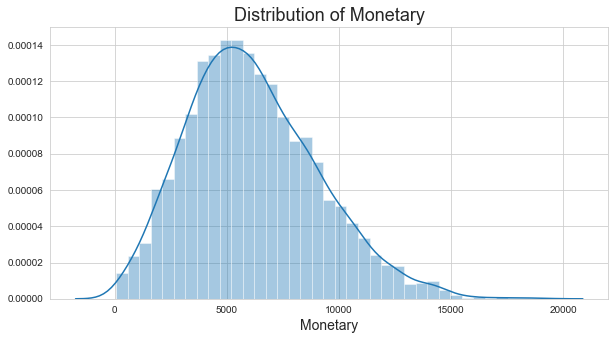

In [103]:
# Plot Distribution of Monetary
plt.figure(figsize=(10,5))
sns.distplot(customers['monetary'])
plt.xlabel('Monetary', fontsize=14)
plt.title('Distribution of Monetary', fontsize=18)
plt.show()

#### Cluster the similar values in RFM categories

In [125]:
from sklearn.cluster import KMeans

In [140]:
def find_num_clusters(dataset, columns, min_cluster, max_cluster, max_iteration):
    """
    dataset: pandas Dataframe
    columns: list of column/columns
    min_cluster: minimum number of clusters
    max_cluster: maximum number of clusters
    max_iteration: maximum number of iterations
    """
    mapping = {}
    values = dataset[columns].copy()
    
    for k in range(min_cluster, max_cluster):
        kmeans = KMeans(n_clusters=k, max_iter=max_iteration).fit(values)
        values["clusters"] = kmeans.labels_
        mapping[k] = kmeans.inertia_ 
    return mapping

#### *RECENCY CLUSTERS*

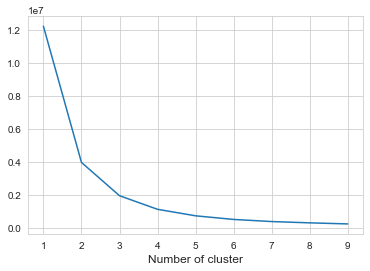

In [141]:
# Evaluate best number of clusters for recency
mapping = find_num_clusters(customers, ['recency'], 1, 10, 1000)

plt.plot(list(mapping.keys()), list(mapping.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.show()

ci

In [183]:
# Create clusters
customers['recency_cluster'] = KMeans(n_clusters=4).fit_predict(customers[['recency']])
customers.head()

,customer_id,recency,frequency,monetary,recency_cluster
1303,3169,0,7,6806.93,0
1846,2396,0,4,4326.13,0
2240,256,0,5,5861.16,0
234,3123,0,4,3733.72,0
497,543,0,5,4605.80,0


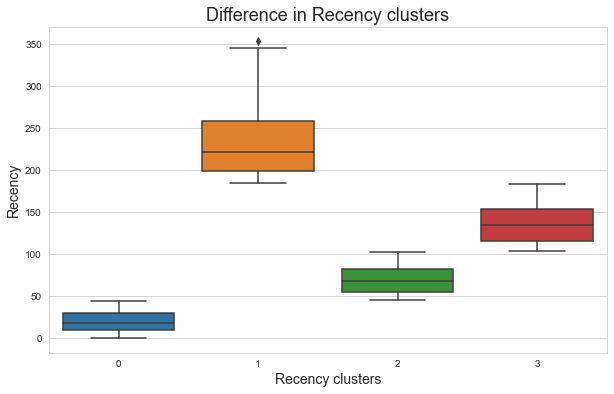

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, x='recency_cluster',  y='recency')
plt.xlabel('Recency clusters', fontsize=14)
plt.ylabel('Recency', fontsize=14)
plt.title('Difference in Recency clusters', fontsize=18)
plt.show()

In [185]:
# Rename correctly the clusters
def order_clusters(dataset, cluster_column, target_column, asc=True):
    """
    dataset: pandas Dataframe
    cluster_column: column of clusters (string)
    target_column: column to sort (string)
    asc: boolean value for ascending sorting
    """
    grouped_cluster = dataset.groupby(cluster_column)[target_column].mean().reset_index()
    grouped_cluster = grouped_cluster.sort_values([target_column], ascending=asc).reset_index(drop=True)
    grouped_cluster['index'] = grouped_cluster.index
    
    renamed_dict = dict(zip(grouped_cluster[cluster_column], grouped_cluster['index']))
    return dataset[cluster_column].replace(renamed_dict)
    

customers['recency_cluster'] = order_clusters(customers,'recency_cluster','recency', asc=False)

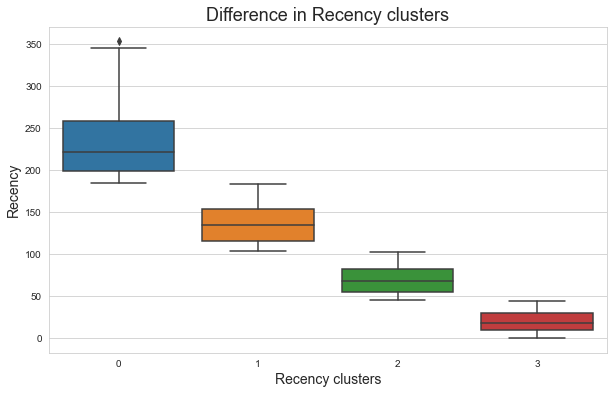

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, x='recency_cluster',  y='recency')
plt.xlabel('Recency clusters', fontsize=14)
plt.ylabel('Recency', fontsize=14)
plt.title('Difference in Recency clusters', fontsize=18)
plt.show()